In [2]:
from backtester import BackTester
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
plt.rcParams["figure.figsize"] = (15,10)
sns.set_theme()

In [18]:
backtest = BackTester(file_name = 'combined_minute.csv',
                     start_date='2011-05-02',
                     end_date ='2022-02-18',
                     gex_bins = 8,
                     transaction_cost= 5,
                     starting_capital = 10000,
                     leverage = 3)

In [19]:
backtest.data.head()

,Unnamed: 0,ticker,ticker.1,trade_date.1,open_bar_time,open_bid_price,open_bid_size,open_ask_price,open_ask_size,first_trade_time,...,repeat_downtick_volume,unknown_tick_volume,trade_to_mid_vol_weight,trade_to_mid_vol_weight_relative,time_weight_bid,time_weight_ask,price_adjustment_factor,volume_adjustment_factor,gex,gex_bin
2011-05-02,0,SPY,SPY,2011-05-02,2011-05-02T13:30:00+00:00,111.3266,89500.0,111.3347,3600.0,2011-05-02T13:30:00.030000+00:00,...,793798.0,0.0,0.2204,0.2208,111.2535,111.2616,0.8122,1.0,1.897313e+09,"(1795655354.03, 2265239341.247]"
2011-05-02,1,SPY,SPY,2011-05-02,2011-05-02T13:31:00+00:00,111.2535,7800.0,111.2616,133200.0,2011-05-02T13:31:00.024000+00:00,...,283638.0,0.0,0.0641,0.0641,111.2779,111.2860,0.8122,1.0,1.897313e+09,"(1795655354.03, 2265239341.247]"
2011-05-02,2,SPY,SPY,2011-05-02,2011-05-02T13:32:00+00:00,111.2779,64600.0,111.2860,24700.0,2011-05-02T13:32:00.041000+00:00,...,331752.0,0.0,0.1828,0.1783,111.2941,111.3023,0.8122,1.0,1.897313e+09,"(1795655354.03, 2265239341.247]"
2011-05-02,3,SPY,SPY,2011-05-02,2011-05-02T13:33:00+00:00,111.2941,56900.0,111.3023,17300.0,2011-05-02T13:33:00.091000+00:00,...,245927.0,0.0,0.0223,0.0223,111.2779,111.2860,0.8122,1.0,1.897313e+09,"(1795655354.03, 2265239341.247]"
2011-05-02,4,SPY,SPY,2011-05-02,2011-05-02T13:34:00+00:00,111.2779,14600.0,111.2860,62000.0,2011-05-02T13:34:00.240000+00:00,...,157681.0,0.0,0.0888,0.0862,111.2616,111.2698,0.8122,1.0,1.897313e+09,"(1795655354.03, 2265239341.247]"


In [20]:
backtest.benchmark_changes = backtest.data.groupby(level=0).nth(-1)[['close_ask_price']].pct_change()
rets = [backtest.evaluate_benchmark_for_day(day) for day in backtest.data.index.unique()]

backtest.evaluate_strategy(mr_sma=60,
                       mr_threshold=0.01,
                       mom_period=60)


2012-08-15 00:00:00 equity: 15743540422175.344 return: 0.05755888091281688, total transactions: 29

KeyboardInterrupt: 

In [16]:
df = pd.DataFrame(backtest.equity_curve[1:], index = backtest.data.index.unique()).rename({0:'Strategy'}, axis = 1)
df['SPY'] = backtest.equity_curve_benchmark(1000000, 1.2, rets)[1:]
df.index = pd.to_datetime(df.index)

Text(0.5, 1.0, 'Intraday Gamma Weighted Mean Reversion & Momentum Strategy vs SPY Buy and Hold')

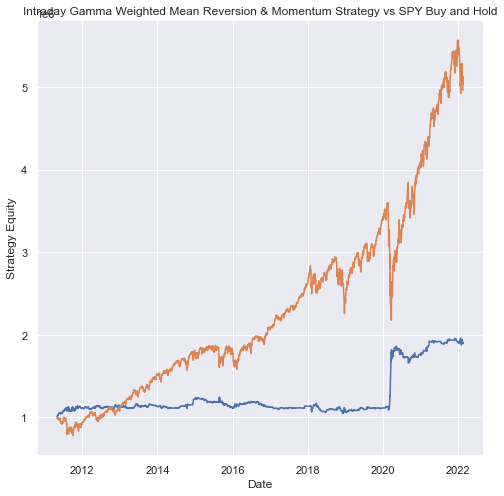

In [17]:
plt.figure(figsize = (8,8))
plt.plot(df['Strategy'])
plt.plot(df['SPY'])
plt.xlabel('Date')
plt.ylabel('Strategy Equity')
plt.title('Intraday Gamma Weighted Mean Reversion & Momentum Strategy vs SPY Buy and Hold')

Text(0.5, 1.0, 'Intraday Gamma Weighted Mean Reversion ( No Fees) & Momentum Strategy vs SPY Buy and Hold')

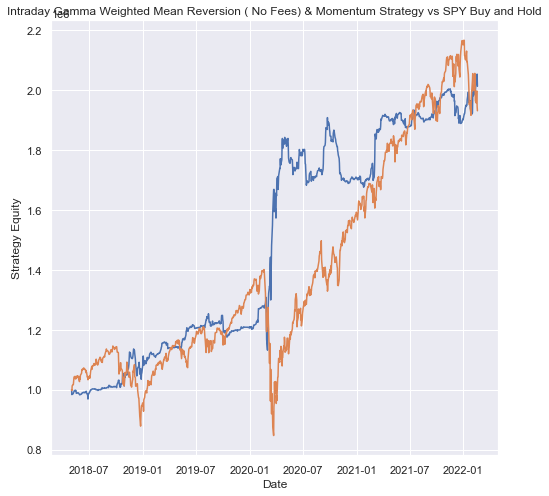

In [25]:
plt.figure(figsize = (8,8))
plt.plot(df['Strategy'])
plt.plot(df['SPY'])
plt.xlabel('Date')
plt.ylabel('Strategy Equity')
plt.title('Intraday Gamma Weighted Mean Reversion ( No Fees) & Momentum Strategy vs SPY Buy and Hold')